<a href="https://colab.research.google.com/github/hank199599/Machine-Learning-for-Practical-Optical-Design-data/blob/main/Regresstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 簡單線性迴歸
Simple Linear Regression

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
dataset = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X.shape, y.shape)

(30, 1) (30,)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_predic = regressor.predict(y_train.reshape(-1,1))
y_predic

array([5.29399688e+08, 6.17130050e+08, 6.02326077e+08, 5.71166705e+08,
       1.06370722e+09, 8.57404884e+08, 4.31856087e+08, 1.13903551e+09,
       5.62185254e+08, 3.72845806e+08, 7.60440731e+08, 8.77984649e+08,
       5.34511919e+08, 5.08866653e+08, 9.86790111e+08, 4.06808961e+08,
       3.67724230e+08, 9.18480618e+08, 6.34971454e+08, 5.32343660e+08])

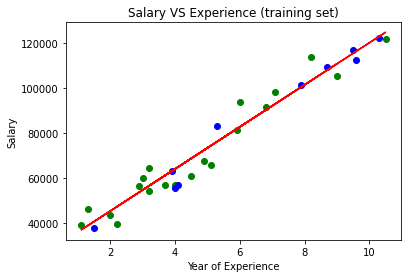

In [111]:
plt.scatter(X_train,y_train,color='g',label="Train")
plt.scatter(X_test,y_test,color='b',label="Test")
plt.plot(X_train,regressor.predict(X_train),color='r')

plt.title('Salary VS Experience (training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

# [polynirial Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

## 一維線性迴歸

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
dataset = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, 2].values
print(X.shape, y.shape)

(10, 1) (10,)


In [114]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

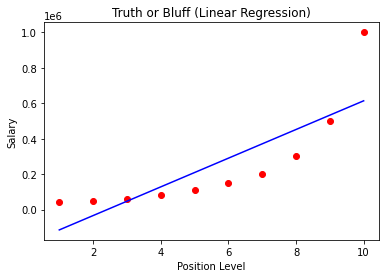

In [115]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

計算R ssore計算R ssore

In [116]:
print("reg1 coef=", lin_reg.coef_)
print("reg1 intercept=", lin_reg.intercept_)
print('score = %.4f' %lin_reg.score(X, y))

reg1 coef= [80878.78787879]
reg1 intercept= -195333.33333333337
score = 0.6690


增加懲罰項的R score


In [117]:
R2 = lin_reg.score(X, y)
AR2 = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print(R2, AR2)

0.6690412331929895 0.6276713873421131


## 二維線性迴歸


In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y)

print('score = %.4f' %lin_reg_2.score(X_poly_2, y))

score = 0.9162


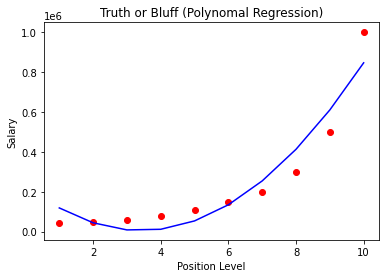

In [119]:
# Visualising the Polynomial Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly_2), color = 'blue')
plt.title('Truth or Bluff (Polynomal Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

增加懲罰項的R score


In [120]:
R2 = lin_reg_2.score(X_poly_2, y)
AR2 = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X_poly_2.shape[1] - 2)
print(R2, AR2)

0.9162082221443942 0.8491747998599096


## 三維線性迴歸


In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

print('score = %.4f' %lin_reg_3.score(X_poly_3, y))

score = 0.9812


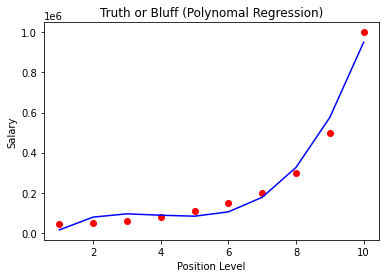

In [122]:
# Visualising the Polynomial Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(X_poly_3), color = 'blue')
plt.title('Truth or Bluff (Polynomal Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

增加懲罰項的R score


In [123]:
R2 = lin_reg_3.score(X_poly_3, y)
AR2 = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X_poly_3.shape[1] - 2)
print(R2, AR2)

0.9812097727913367 0.9577219887805075


## 四維線性迴歸


In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y)

print('score = %.4f' %lin_reg_4.score(X_poly_4, y))

score = 0.9974


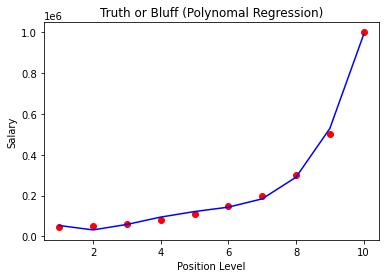

In [125]:
# Visualising the Polynomial Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(X_poly_4), color = 'blue')
plt.title('Truth or Bluff (Polynomal Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

增加懲罰項的R score


In [126]:
R2 = lin_reg_4.score(X_poly_4, y)
AR2 = 1 - (1 - R2) * (len(y) - 1) / (len(y) - X_poly_4.shape[1] - 2)
print(R2, AR2)

0.9973922891706614 0.9921768675119841


# Multiple Linear Regression

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
dataset = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

print(X.shape, y.shape)

(50, 4) (50,)


Avoiding the Dummy Variable Trap

In [129]:
X = X[:, 1:]
print(X[0:5,:])

[[136897.8 471784.1 'New York']
 [151377.59 443898.53 'California']
 [101145.55 407934.54 'Florida']
 [118671.85 383199.62 'New York']
 [91391.77 366168.42 'Florida']]


Splitting the dataset into the Training set and Test set

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[0:5,:])

(40, 3) (10, 3) (40,) (10,)
[[103057.49 214634.81 'Florida']
 [85047.44 205517.64 'New York']
 [144135.98 134050.07 'Florida']
 [157693.92 210797.67 'California']
 [114175.79 294919.57 'Florida']]


Fitting Multiple Linear Regression to the Training set

In [135]:

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehotencoder = OneHotEncoder()
X1 = X[:,3].reshape(-1, 1)
X1 = onehotencoder.fit_transform(X1).toarray()
X = np.c_[X1, X[:, 0:3]]

print(X1[0:5,:])
print(X[0:5,:])

# labelencoder = LabelEncoder()
# X[:, 3] = labelencoder.fit_transform(X[:, 3])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


Avoiding the Dummy Variable Trap

In [136]:
X = X[:, 1:]
print(X[0:5,:])

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[0:5,:])

# Fitting Multiple Linear Regression to the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
print('coef= ', regressor.coef_)
print('intercept= ', regressor.intercept_)
print('score= ', regressor.score(X, y))

## Building the optimal model using Backward Elimination

In [ ]:
import statsmodels.api as sm
# X_train = np.append(arr = np.ones((40, 1)), values = X_train, axis = 1)
X_train = sm.add_constant(X_train)
X_opt = X_train[:, [0, 1, 2, 3, 4, 5]] # why need to write 0~5
X_opt = np.array(X_opt, dtype='float')

regressor_OLS = sm.OLS(y_train, X_opt).fit()
print(regressor_OLS.summary())

In [ ]:
X_opt = X_train[:, [0, 1, 3, 4, 5]] 
X_opt = np.array(X_opt, dtype='float')
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

In [ ]:
X_opt = X_train[:, [0, 3, 4, 5]] 
X_opt = np.array(X_opt, dtype='float')
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

In [ ]:
X_opt = X_train[:, [0, 3, 5]] 
X_opt = np.array(X_opt, dtype='float')
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())

In [ ]:
X_opt = X_train[:, [0, 3]] 
X_opt = np.array(X_opt, dtype='float')
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
print(regressor_OLS.summary())